In [1]:
import gym

from zadania import LogisticAgent, AgentTrainer

In [2]:
# URUCHOMIENIE TEJ KOMÓRKI SPOWODUJE PODMIENIENIE METODY `train` KLASY `AgentTrainer`
# NA TAKĄ, KTÓRA ANIMUJE W NOTEBOOKU WYKRES REWARD W TRAKCIE UCZENIA

%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np

def train(self, n_episodes, max_steps_per_episode, report_every_n_episodes, update_every_n_episodes, n_repeats_per_report):
    self.ep_buffer = []
    rewards = []

    fig = plt.figure(figsize=(9,5))
    _x = np.linspace(1, n_episodes, 1)
    _y = np.zeros(n_episodes)
    ax = fig.add_subplot(1,1,1)
    line, = ax.plot([], [], label="Reward", color="blue", linewidth=2)
    ax.set_xlim(0., n_episodes)
    ax.set_ylim(-10., max_steps_per_episode + 10)
    ax.legend()

    def animate(episode_idx):
        line.set_xdata(np.arange(len(rewards))+1)
        line.set_ydata(np.array(rewards))
        self.ep_buffer.append(self.episode(n_steps=max_steps_per_episode))
        rewards.append(self.ep_buffer[-1]["rewards"].sum())
        if ((episode_idx + 1) % update_every_n_episodes == 0):
            for episode in self.ep_buffer:
                self.agent.update(episode)
            self.ep_buffer = []
        if ((episode_idx + 1) % report_every_n_episodes == 0):
            for _ in range(n_repeats_per_report):
                episode = self.episode(show=True)
        return line,

    return animation.FuncAnimation(fig, animate, np.arange(n_episodes), interval=1, blit=True, repeat=False)

AgentTrainer.train = train

In [3]:
env = gym.make('CartPole-v0')
agent = LogisticAgent(learning_rate=.1, seed=43)
trainer = AgentTrainer(agent, env)

<IPython.core.display.Javascript object>


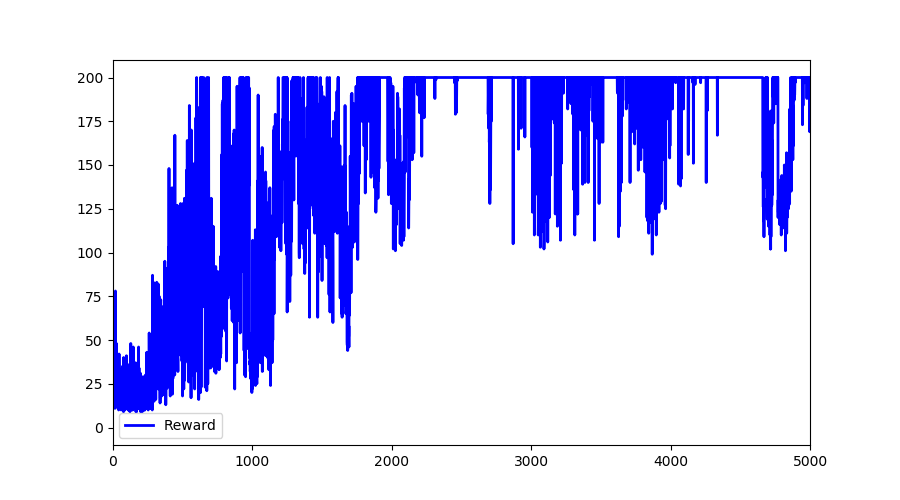

In [4]:
_ = trainer.train(
    n_episodes=5000,
    max_steps_per_episode=200, # CartPole ma zakodowaną maks. liczbę kroków na epizod = 200
    report_every_n_episodes=500,
    update_every_n_episodes=10,
    n_repeats_per_report=1)

Uczenie jest dość powolne i niestabilne - można poeksperymentować z parametrami agenta i trenera.